In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/20220303/full.csv')

In [5]:
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [6]:
df_full = df.to_numpy()
df_full[:10]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77]])

In [7]:
import numpy as np
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [8]:
df_full.shape # 넘파이 형태
# 데이터를 분류하는 코드가 넘파이 배열을 받아들여야 하기 때문

(56, 3)

In [9]:
len(weight)

56

## 다항 특성 만들어주기 전
### 데이터 분류

In [10]:
from sklearn.model_selection import train_test_split
train, test, train_target, test_target = train_test_split(df_full, weight, random_state=42) # x값 y값

### 다항 특성 만들기 - 다항식 (곡선 형태로 다항식을 만들어 예측하려는 것)

In [11]:
# 곡선으로 이루어진 다항식을 수동으로 만들어 준 것이 이전 파일에서의 예제임

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# 사이킷런은 항상 비슷한 패턴으로 쓰임
# 훈련을 할 때도 fit을 쓰지만, 다항 특징을 적용할 때에도 fit을 사용

In [14]:
poly = PolynomialFeatures(include_bias=False) # 절편(bias) 포함 X
# (bias는 수학에서 보조형태로 끼워넣는 경우가 많아 쓸모없을 가능성이 높음)

poly.fit([[2,3]])
poly.transform([[2,3]]) # transform : (머신러닝은 아니지만) preprocessing 결과를 알려줌 (*predict는 머신러닝으로, 예측값)

# column : 6 생성
# 1 : 절편(bias), 2, 3   # 2 ** 2   # 2 * 3    # 3 : 3 ** 2  <-- 이런식으로 생성된 것
# 즉 1, 2, 3 각각 배열하고, 서로의 곱셈과, 각각의 제곱값으로 배열 형성

array([[2., 3., 4., 6., 9.]])

In [15]:
# 사이킷런의 변환기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train) # train값에 poly값 적용시켜주기
train_poly = poly.transform(train)
train_poly.shape

(42, 9)

In [16]:
train_poly[:1] # 그냥 쉽게 얘기해서 데이터 값이 뻥튀기 된 것
# Why? --> 특성이 조금 더 가시적으로 확연히 눈에 띄도록 표현될 수 있도록 만들어 주기 위함

array([[ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
         26.4196,  15.6256,   9.2416]])

In [17]:
poly.get_feature_names_out() # 어떻게 만들어졌는지 보여줌 (참고용)

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [18]:
test_poly = poly.transform(test)
test_poly.shape

(14, 9)

In [19]:
# 분석해야 하는 데이터의 차수가 적을 때 조금 더 많은 것을 반영하기 위해 차수를 늘려주는 과정임

### 선형 회귀 모델에서 x의 값을 다중으로 넣으면 --> 다중 회귀 모델
##### 기존의 선형 회귀 모델에 독립변수가 더해졌을 때 다중 회귀 모델로 변환되는 것이므로 각각 따로 존재하는 것이 아니라 언제나 출발점은 선형 회귀 모델인 것

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(test_poly, test_target), lr.score(train_poly, train_target)
# 방정식을 구하는데 필요한 데이터의 양이 많을수록 잘 반영된 것을 알 수 있음

(0.9714559911594223, 0.9903183436982125)

### 특성을 더 만들어보기

In [21]:
# degree : int 혹은 tuple 형태로 줄 수 있음

# 사이킷런의 변환기
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train) # train값에 poly값 적용시켜주기
train_poly = poly.transform(train)
test_poly = poly.transform(test)
train_poly.shape, test_poly.shape
# 55개까지 증가

((42, 55), (14, 55))

In [22]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(test_poly, test_target), lr.score(train_poly, train_target)
# 학습용 데이터는 거의 100%이지만 학습하지 않은 검증용 데이터는 마이너스값이 나옴 --> 너무 많은 데이터로 인한 과적합 발생

(-144.40508211356158, 0.9999999999957028)

### 학습용 데이터는 잘 반영(너무 잘 반영됨) --> 과적합...그래서 학습하지 않은 데이터는 오히려 못 맞추는 경향이 생기게  됨
#### 수동으로 일일이 값을 하나씩 늘려가며 최적의 값을 찾을 필요 X, 이러한 기능을 수행하는 library가 있음 ==> '규제'
#### 즉 과적합을 해결하기 위해 규제를 하고 규제 전에 표준화가 선행되어야 함

In [23]:
# 표준화 : (값 - mean 평균) / std 표준편차 -1 ~ 1
# 표준화 역시 미리 데이터를 표현하는 것이기 때문에 사이킷런의 하위 명령어임 (그러나 preprocessing은 머신러닝은 아님)
# 머신러닝이 아닌 것은 fit 한 후 transform 을 하는 패턴
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()
ss.fit(train_poly) # 해당 데이터를 적용하여 어떻게 내부 데이터가 생성되었는지 확인하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
print(train_scaled[:1], test_scaled[:1]) # print를 안 써 주면 마지막 값만 출력되기 때문에 씌워준 것
train_scaled.shape, test_scaled.shape # 차수가 맞는지 확인

[[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
  -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
  -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
  -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
  -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
  -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
  -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
  -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
  -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
  -0.75143746]] [[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344

((42, 55), (14, 55))

### 리니어 모델은 대부분 회귀와 관련된 것으로 머신러닝의 하나임
### 릿지 회귀 & 라쏘 회귀 (규제 알고리즘으로, 늘 표준화된 데이터를 가짐)

# 릿지 회귀

In [25]:
from sklearn.linear_model import Ridge

In [26]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target) # 학습한 데이터와 학습하지 않은 데이터
# 학습한 데이터는 규제를 가하여 적중률이 약간은 떨어짐
# 다형 회귀에서 평가가 잘 나왔다면 굳이 특성을 증가시켜 규제를 하는 ridge까지는 이용하지 않아도 됨

# 머신러닝은 주로 데이터를 가볍게 분석하고 예측할 때 주로 이용

(0.9896101671037343, 0.9790693977615381)

### 규제를 통해 과적합된 학습을 조정하는 역할
### alpha 라는 parameter을 조정해서 성능 좋은 모델 찾기
## < Hyper Parameter Tuning >

In [27]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [28]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [29]:
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target) # 스케일된 데이터 훈련하기
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

<function matplotlib.pyplot.show(close=None, block=None)>

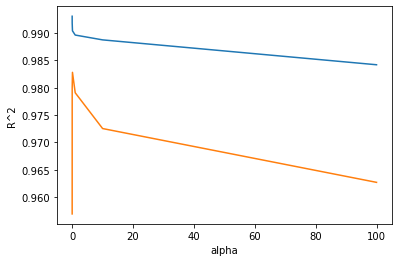

In [30]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show

In [31]:
alpha_list, np.log10(alpha_list)

([0.001, 0.01, 0.1, 1, 10, 100], array([-3., -2., -1.,  0.,  1.,  2.]))

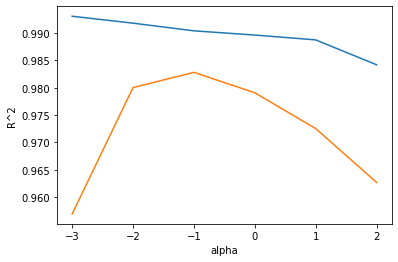

In [32]:
# x축의 범위를 더 좁게 주기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# x축은 로그를 썼기 때문에 실제 값이 아닌, 위치값임

In [33]:
ridge = Ridge(alpha=0.1) # 학습데이터는 조금 낮아도 학습에 참여하지 않은 데이터의 예측값이 가장 높은 결정계수를 적어줌
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

# 특성을 어느 정도까지 늘려주어 '퓨처 엔지니어'를 해 주면
# 릿지는 데이터를 표준화시킨 상태에서 데이터를 분류한 후 규제를 가한다. (alpha : 규제의 강도를 정해주는 변수)

(0.9903815817570366, 0.982797646538695)

# 라쏘 회귀

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso()
# 훈련
# train 데이터에 대한 결정계수(평가지수) R^2  <-- score 이용
lasso.fit(train_scaled, train_target)
# 결정계수 평가 (95 이상이면 최적 조건, 실제로 85% 이상만 나와도 적합한 머신러닝임이 인정됨)
lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.989789897208096, 0.9800593698421884)

# 하이퍼 파라미터 튜닝

In [36]:
# 평가된 결정계수를 저장할 값 다시 초기화
train_score = []
test_score = []

In [37]:
alpha_list = [0.1, 1.0, 10, 100]

In [38]:
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter=10000) # for문의 각각의 요소 저장
    # lasso에서 규제를 가할 때는 최대 강도를 지정해 주어야 함 (반복학습을 통한 최적화를 하기 때문에 성능이 더욱 좋아야 함)
    lasso.fit(train_scaled, train_target) # 저장된 데이터 훈련시키기
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

# 오류가 날 때에는 규제를 조정해 주면 됨

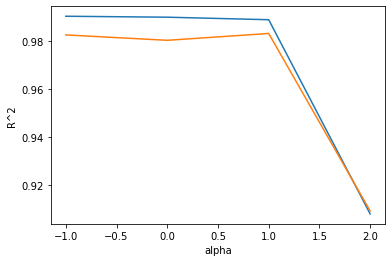

In [39]:
# 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [40]:
train_score, np.log10(alpha_list)
# 범위 때문에 -1 과 0 사이값(0.5)가 함께 출력된 것이고, 실제로는 -1.,  0.,  1.,  2. 값만 출력된 것이 맞음

([0.9902080238600283,
  0.9898116789062786,
  0.9887624603020236,
  0.9078618674946646],
 array([-1.,  0.,  1.,  2.]))

In [41]:
# alpha = 10

In [45]:
# !pip install scikit-learn --user --upgrade <-- poly.get_features_names_out()이 버전 업그레이드 이후 실행됨
import sklearn
sklearn.__version__
# 1.0.2 *최신버전*

'1.0.2'

ParserError: Error tokenizing data. C error: Expected 1 fields in line 26, saw 376
